# Spatial visualization

Viusalize spatial information to obtain good intuition. 

1. Visualize the basic maps for South Australia and Adelaide.
2. Visualize the economic, mobility flow, and road network info on top of the basic maps.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot
import pickle
import geoplot.crs as gcrs

#### Q: Do we focus on the whole South Australia or only Adelaide?

## 0. Read files

In [7]:
# read flow and transaction data
trans_mcc_df = pd.read_pickle("../../data_process/trans_mcc_df.pkl")
trans_age_df = pd.read_pickle("../../data_process/trans_age_df.pkl")
flow_df = pd.read_pickle("../../data_process/flow_df.pkl")

In [8]:
# read spatial files
sa2_south_au = gpd.read_file("../../data_process/shapefiles/sa2_south_au.shp")
sa2_adelaide = gpd.read_file('../../data_process/shapefiles/sa2_adelaide.shp')

In [9]:
# read road networks
sa2_roads = gpd.read_file("../../data_process/shapefiles/sa2_roads.shp")

In [10]:
# read job and income data
jobs_all=pd.read_pickle("../../data_process/jobs_all.pkl")
jobs_industries=pd.read_pickle("../../data_process/jobs_industries.pkl")


## 1. Basic maps

In [11]:
# projection.
sa2_south_au_proj = sa2_south_au.to_crs("epsg:3112")
sa2_south_au_proj.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
sa2_adelaide_proj = sa2_adelaide.to_crs("epsg:3112")
sa2_adelaide_proj.crs


<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Size of the South Australia Area:  (172, 13)


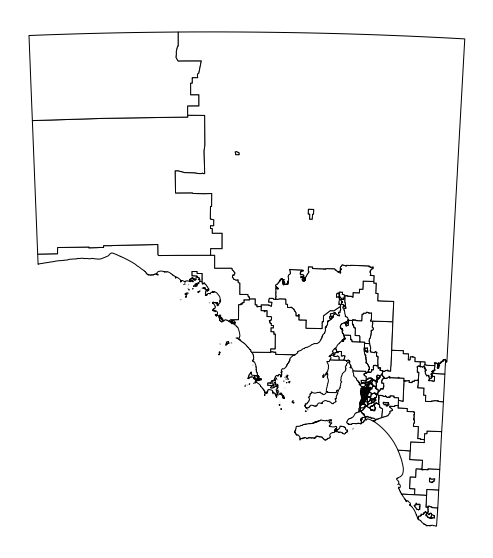

In [13]:
# South Australia area
ax = sa2_south_au_proj.plot(facecolor='w', edgecolor='k', figsize = (10,10))
ax.set_axis_off()
print("Size of the South Australia Area: ", sa2_south_au_proj.shape)

Size of the Adelaide area:  (110, 13)


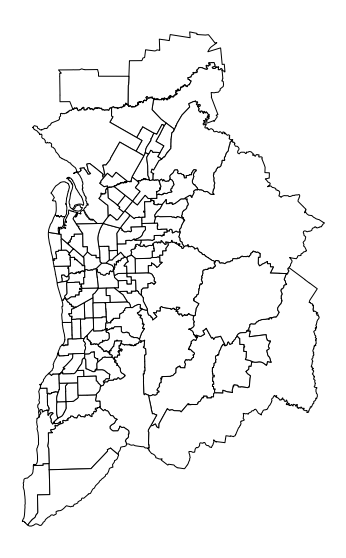

In [14]:
# Adelaide area
ax = sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', figsize = (10,10))
ax.set_axis_off()
print("Size of the Adelaide area: ", sa2_adelaide_proj.shape)

## 2. Visualize economic, flow, transaction, and road information.

In [15]:
# Augment info to the two shapefiles.
print(flow_df.columns)
print(jobs_all.columns)
print(sa2_south_au_proj.columns)
print(sa2_adelaide_proj.columns)


Index(['timestamp', 'sa2', 'state', 'agent_home_sa2', 'unique_agents',
       'sum_stay_duration', 'total_stays'],
      dtype='object')
Index(['sa2_name16', 'num_jobs_000_persons',
       'median_income_per_job_aud_persons',
       'median_income_per_job_aud_females', 'median_income_per_job_aud_males',
       'sa2_code16', 'num_jobs_000_males', 'num_jobs_000_females'],
      dtype='object')
Index(['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'geometry'],
      dtype='object')
Index(['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'geometry'],
      dtype='object')


In [16]:
# Group flow_df, trans_mcc_df, and trans_age_df
flow_source_sa2_group = flow_df.groupby(by=["agent_home_sa2"]).sum()
flow_target_sa2_group = flow_df.groupby(by=["sa2"]).sum()



In [17]:
flow_source_sa2_group.head(50)

,state,unique_agents,sum_stay_duration,total_stays
agent_home_sa2,,,,
401011001,580,149775,363030268,1161191
401011002,520,76947,169893683,520850
401021003,516,68608,154249351,421177
401021004,576,169271,373258981,1103391
401021005,452,41880,94708375,296571
401021006,556,79745,189925203,584993
401021007,604,126751,368187285,968350
401021008,500,58444,134966439,458177
401021009,480,43153,107233511,310922


In [18]:
flow_source_sa2_group.index

Index(['401011001', '401011002', '401021003', '401021004', '401021005',
       '401021006', '401021007', '401021008', '401021009', '401021010',
       ...
       '407031161', '407031162', '407031163', '407031164', '407031165',
       '407031166', '407031167', '407031168', '407031169', '407031170'],
      dtype='object', name='agent_home_sa2', length=163)

In [19]:
flow_source_sa2_group['o_sa2'] = flow_source_sa2_group.index
flow_target_sa2_group['d_sa2'] = flow_target_sa2_group.index
#note: unique_agents_home_based is the same as unique_agents from earlier, just renamed
flow_source_sa2_group.columns = ['state', 'unique_agents_home_based', 
                                 'sum_stay_duration_home_based',
                                 'total_stays_home_based', 'o_sa2'] 
flow_target_sa2_group.columns = ['state', 'unique_agents_d_based', 
                                 'sum_stay_duration_d_based',
                                 'total_stays_d_based', 'd_sa2']
print(flow_source_sa2_group.head(5))
print(flow_target_sa2_group.head(5))

#
trans_age_source_sa2_group = trans_age_df.groupby(by = ['source_sa2']).sum()
trans_age_target_sa2_group = trans_age_df.groupby(by = ['target_sa2']).sum()
trans_age_source_sa2_group['o_sa2'] = trans_age_source_sa2_group.index
trans_age_target_sa2_group['d_sa2'] = trans_age_target_sa2_group.index
trans_age_source_sa2_group.columns = ['count_credit_o_from_age_file', 'amount_credit_o_from_age_file', 'o_sa2']
trans_age_target_sa2_group.columns = ['count_credit_d_from_age_file', 'amount_credit_d_from_age_file', 'd_sa2']
print(trans_age_source_sa2_group.head(5))
print(trans_age_target_sa2_group.head(5))

#
trans_mcc_source_sa2_group = trans_mcc_df.groupby(by = ['source_sa2']).sum()
trans_mcc_target_sa2_group = trans_mcc_df.groupby(by = ['target_sa2']).sum()
trans_mcc_source_sa2_group['o_sa2'] = trans_mcc_source_sa2_group.index
trans_mcc_target_sa2_group['d_sa2'] = trans_mcc_target_sa2_group.index
trans_mcc_source_sa2_group.columns = ['count_credit_o_from_mcc_file', 'amount_credit_o_from_mcc_file', 'o_sa2']
trans_mcc_target_sa2_group.columns = ['count_credit_o_from_mcc_file', 'amount_credit_o_from_mcc_file', 'd_sa2']
print(trans_mcc_source_sa2_group.head(5))
print(trans_mcc_target_sa2_group.head(5))

                state  unique_agents_home_based  sum_stay_duration_home_based  \
agent_home_sa2                                                                  
401011001         580                    149775                     363030268   
401011002         520                     76947                     169893683   
401021003         516                     68608                     154249351   
401021004         576                    169271                     373258981   
401021005         452                     41880                      94708375   

                total_stays_home_based      o_sa2  
agent_home_sa2                                     
401011001                      1161191  401011001  
401011002                       520850  401011002  
401021003                       421177  401021003  
401021004                      1103391  401021004  
401021005                       296571  401021005  
           state  unique_agents_d_based  sum_stay_duration_d_based  

In [20]:
flow_source_sa2_group.head(5)

,state,unique_agents_home_based,sum_stay_duration_home_based,total_stays_home_based,o_sa2
agent_home_sa2,,,,,
401011001,580,149775,363030268,1161191,401011001
401011002,520,76947,169893683,520850,401011002
401021003,516,68608,154249351,421177,401021003
401021004,576,169271,373258981,1103391,401021004
401021005,452,41880,94708375,296571,401021005


In [21]:
print(sa2_south_au_proj.shape)
print(sa2_adelaide_proj.shape)

(172, 13)
(110, 13)


In [22]:
sa2_south_au_proj.head(5)

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ..."
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ..."
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ..."
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ..."
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ..."


In [23]:
# merge info to sa2_south_au_proj.
how = 'left'

sa2_south_au_proj=sa2_south_au_proj.merge(flow_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = how)
sa2_south_au_proj=sa2_south_au_proj.merge(flow_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = how)

sa2_south_au_proj=sa2_south_au_proj.merge(trans_age_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = how)
sa2_south_au_proj=sa2_south_au_proj.merge(trans_age_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = how)

sa2_south_au_proj=sa2_south_au_proj.merge(trans_mcc_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = how)
sa2_south_au_proj=sa2_south_au_proj.merge(trans_mcc_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = how)

#
sa2_south_au_proj=sa2_south_au_proj.merge(jobs_all, left_on = 'SA2_MAIN16', right_on = 'sa2_code16', how = how)
sa2_south_au_proj=sa2_south_au_proj.merge(jobs_industries, left_on = 'SA2_MAIN16', right_on = 'sa2_code16', how = how)


In [24]:
# merge info to sa2_adelaide_proj.
sa2_adelaide_proj=sa2_adelaide_proj.merge(flow_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = how)
sa2_adelaide_proj=sa2_adelaide_proj.merge(flow_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = how)

sa2_adelaide_proj=sa2_adelaide_proj.merge(trans_age_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = how)
sa2_adelaide_proj=sa2_adelaide_proj.merge(trans_age_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = how)

sa2_adelaide_proj=sa2_adelaide_proj.merge(trans_mcc_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = how)
sa2_adelaide_proj=sa2_adelaide_proj.merge(trans_mcc_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = how)

#
sa2_adelaide_proj=sa2_adelaide_proj.merge(jobs_all, left_on = 'SA2_MAIN16', right_on = 'sa2_code16', how = how)
sa2_adelaide_proj=sa2_adelaide_proj.merge(jobs_industries, left_on = 'SA2_MAIN16', right_on = 'sa2_code16', how = how)


In [25]:
print(sa2_south_au_proj.shape)
print(sa2_adelaide_proj.shape)

(172, 85)
(110, 85)


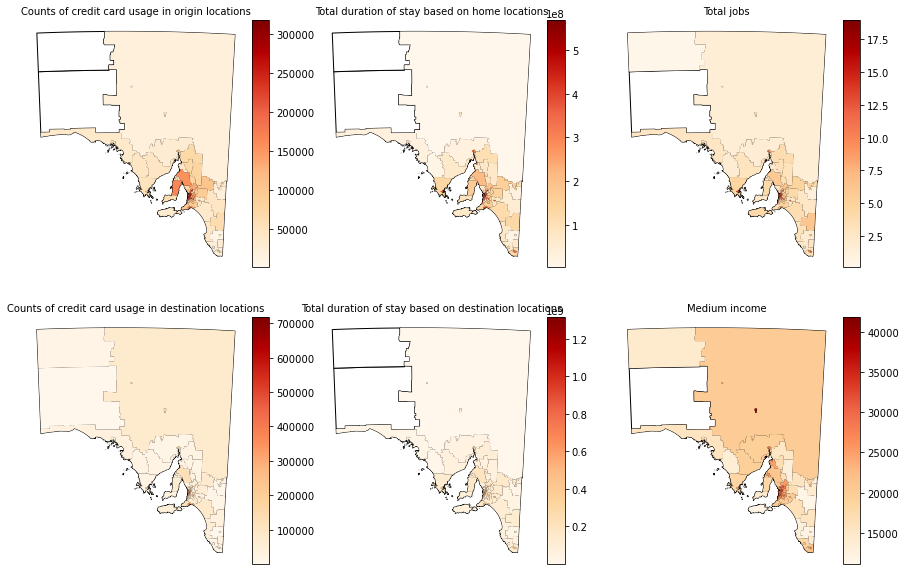

In [26]:
# visualization for south australia areas
from mpl_toolkits.axes_grid1 import make_axes_locatable

# params
figsize = (8,8)

fig, ax = plt.subplots(2,3,figsize=(15,10))

# 
divider = make_axes_locatable(ax[0,0]) # for legend size
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_south_au_proj.plot(facecolor='w', edgecolor='k', ax = ax[0,0])
sa2_south_au_proj.plot(column = 'count_credit_o_from_age_file', cmap='OrRd', legend=True, ax = ax[0,0], cax = cax)
ax[0,0].set_title("Counts of credit card usage in origin locations", fontsize=10)
ax[0,0].set_axis_off()

# 
divider = make_axes_locatable(ax[1,0]) # for legend size 
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_south_au_proj.plot(facecolor='w', edgecolor='k', ax = ax[1,0])
sa2_south_au_proj.plot(column = 'count_credit_d_from_age_file', cmap='OrRd', legend=True, ax = ax[1,0], cax = cax)
ax[1,0].set_title("Counts of credit card usage in destination locations", fontsize=10)
ax[1,0].set_axis_off()

# 
divider = make_axes_locatable(ax[0,1]) # for legend size
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_south_au_proj.plot(facecolor='w', edgecolor='k', ax = ax[0,1])
sa2_south_au_proj.plot(column = 'sum_stay_duration_home_based', cmap='OrRd', legend=True, ax = ax[0,1], cax = cax)
ax[0,1].set_title("Total duration of stay based on home locations", fontsize=10)
ax[0,1].set_axis_off()

# 
divider = make_axes_locatable(ax[1,1]) # for legend size 
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_south_au_proj.plot(facecolor='w', edgecolor='k', ax = ax[1,1])
sa2_south_au_proj.plot(column = 'sum_stay_duration_d_based', cmap='OrRd', legend=True, ax = ax[1,1], cax = cax)
ax[1,1].set_title("Total duration of stay based on destination locations", fontsize=10)
ax[1,1].set_axis_off()

# 
divider = make_axes_locatable(ax[0,2]) # for legend size
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_south_au_proj.plot(facecolor='w', edgecolor='k', ax = ax[0,2])
sa2_south_au_proj.plot(column = 'num_jobs_000_persons', cmap='OrRd', legend=True, ax = ax[0,2], cax = cax)
ax[0,2].set_title("Total jobs", fontsize=10)
ax[0,2].set_axis_off()

# 
divider = make_axes_locatable(ax[1,2]) # for legend size 
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_south_au_proj.plot(facecolor='w', edgecolor='k', ax = ax[1,2])
sa2_south_au_proj.plot(column = 'median_income_per_job_aud_persons', cmap='OrRd', legend=True, ax = ax[1,2], cax = cax)
ax[1,2].set_title("Medium income", fontsize=10)
ax[1,2].set_axis_off()


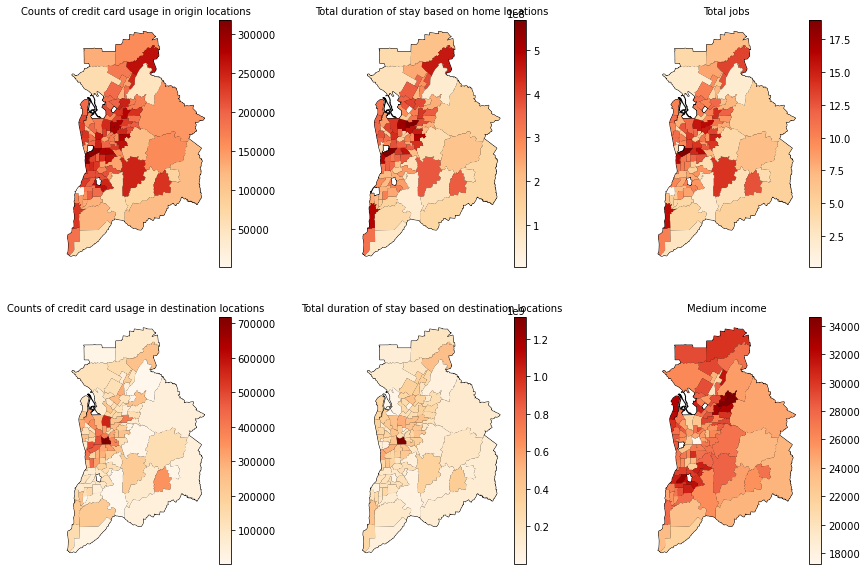

In [27]:
# visualization for south australia areas
from mpl_toolkits.axes_grid1 import make_axes_locatable

# params

fig, ax = plt.subplots(2,3,figsize=(15,10))

# 
divider = make_axes_locatable(ax[0,0]) # for legend size
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', ax = ax[0,0])
sa2_adelaide_proj.plot(column = 'count_credit_o_from_age_file', cmap='OrRd', legend=True, ax = ax[0,0], cax = cax)
ax[0,0].set_title("Counts of credit card usage in origin locations", fontsize=10)
ax[0,0].set_axis_off()

# 
divider = make_axes_locatable(ax[1,0]) # for legend size 
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', ax = ax[1,0])
sa2_adelaide_proj.plot(column = 'count_credit_d_from_age_file', cmap='OrRd', legend=True, ax = ax[1,0], cax = cax)
ax[1,0].set_title("Counts of credit card usage in destination locations", fontsize=10)
ax[1,0].set_axis_off()

# 
divider = make_axes_locatable(ax[0,1]) # for legend size
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', ax = ax[0,1])
sa2_adelaide_proj.plot(column = 'sum_stay_duration_home_based', cmap='OrRd', legend=True, ax = ax[0,1], cax = cax)
ax[0,1].set_title("Total duration of stay based on home locations", fontsize=10)
ax[0,1].set_axis_off()

# 
divider = make_axes_locatable(ax[1,1]) # for legend size 
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', ax = ax[1,1])
sa2_adelaide_proj.plot(column = 'sum_stay_duration_d_based', cmap='OrRd', legend=True, ax = ax[1,1], cax = cax)
ax[1,1].set_title("Total duration of stay based on destination locations", fontsize=10)
ax[1,1].set_axis_off()

# 
divider = make_axes_locatable(ax[0,2]) # for legend size
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', ax = ax[0,2])
sa2_adelaide_proj.plot(column = 'num_jobs_000_persons', cmap='OrRd', legend=True, ax = ax[0,2], cax = cax)
ax[0,2].set_title("Total jobs", fontsize=10)
ax[0,2].set_axis_off()

# 
divider = make_axes_locatable(ax[1,2]) # for legend size 
cax = divider.append_axes("right", size="8%", pad=0.1) # for legend size
sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', ax = ax[1,2])
sa2_adelaide_proj.plot(column = 'median_income_per_job_aud_persons', cmap='OrRd', legend=True, ax = ax[1,2], cax = cax)
ax[1,2].set_title("Medium income", fontsize=10)
ax[1,2].set_axis_off()


#### Q: The income distribution is not concentrated, is it correct? A: Intuitively, it is correct.

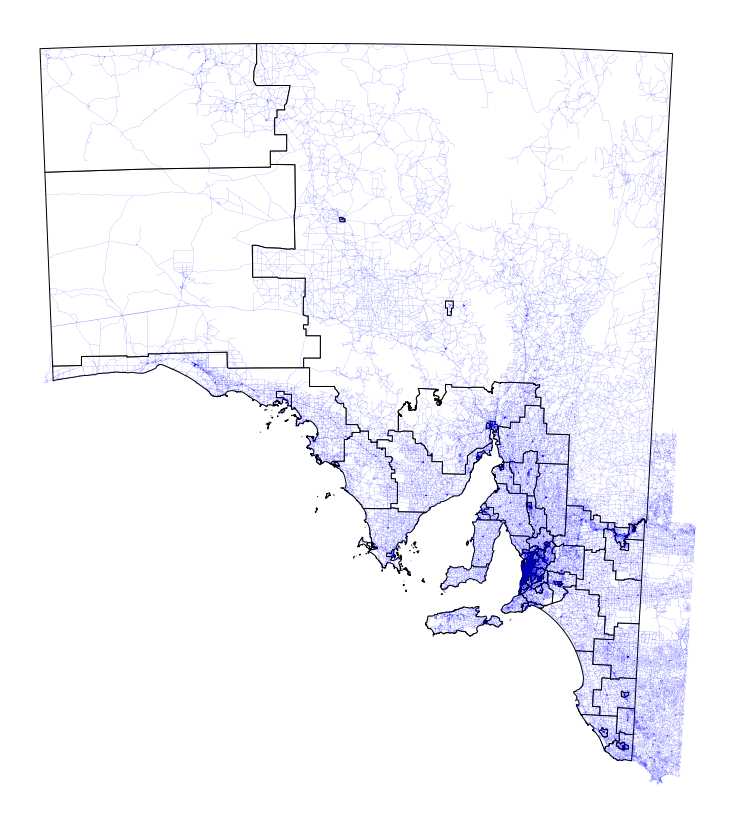

In [28]:
# road info for 
sa2_roads_proj = sa2_roads.to_crs("epsg:3112") # project

#
ax = sa2_south_au_proj.plot(edgecolor='k', facecolor='w', figsize = (15,15))
sa2_roads_proj.plot(ax = ax, edgecolor='b', linewidth=0.1)
ax.set_axis_off()

# note: resolution of roads and SA2 does not match up yet.

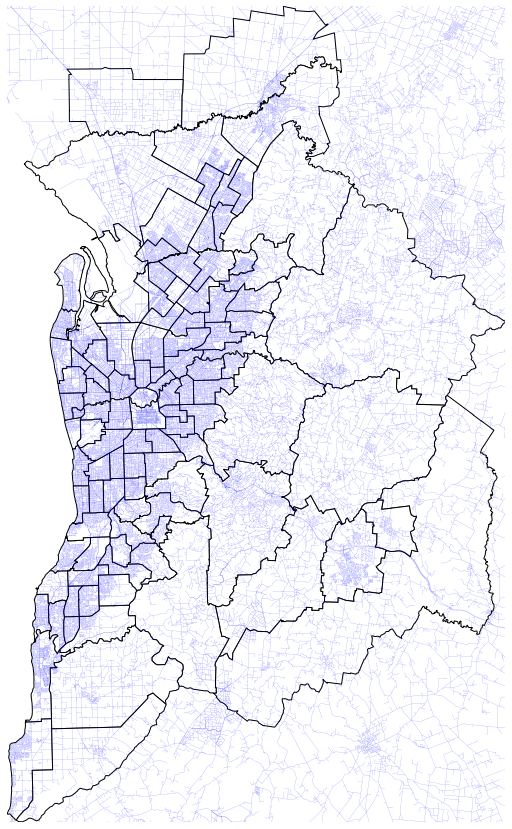

In [29]:
# only adelaide
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (15,15))
sa2_roads_proj.plot(ax = ax, edgecolor='b', linewidth=0.1)
ax.set_xlim(sa2_adelaide_proj.total_bounds[0], sa2_adelaide_proj.total_bounds[2])
ax.set_ylim(sa2_adelaide_proj.total_bounds[1], sa2_adelaide_proj.total_bounds[3])
ax.set_axis_off()
